# Workshop #2: Calculus

In [1]:
#importing libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Problem 1
Let $f(x) = x^4 - x^3$.
* Find $f'(x)$ and hence find the critical points of the function.
* Using $f''(x)$, establish the nature of the critical points (i.e. if they are min, max, or neither).
* Calculate any local max/min values the function may have.

Critical points of f:  [0, 3/4]

First critical point using second derivative:  0
Second critical point using second derivative:  9/4

0 is undefined / extreme point.
3/4 is a local minimum.


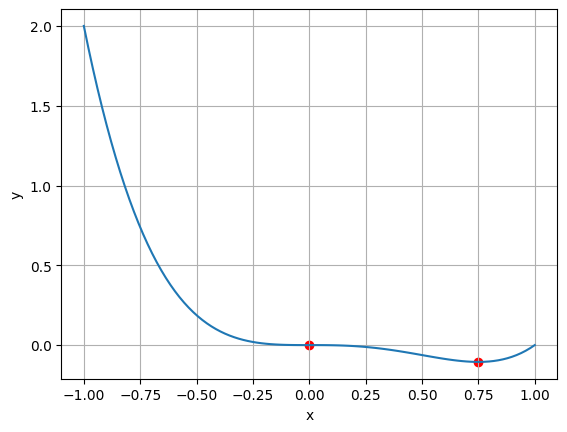

In [2]:
# define variables and functions:
x,y = sp.symbols('x y')
f = x**4 - x**3

# Find critical points
# Solve the equation f'(x) = 0 to find critical points
f_diff = f.diff()
eq = sp.Eq(f_diff, 0)
f_critical = sp.solve(eq, x)
print('Critical points of f: ',f_critical)
print()

# Test the critical points using second derivative
f_sec_diff = f.diff().diff()
p_1 = f_sec_diff.subs(x, f_critical[0])
p_2 = f_sec_diff.subs(x, f_critical[1])
print('First critical point using second derivative: ', p_1)
print('Second critical point using second derivative: ', p_2)
print()

if p_1 > 0:
  print(f_critical[0], "is a local minimum.")
elif p_1 < 0:
  print(f_critical[0], "is a local maximum.")
else:
  print(f_critical[0], "is undefined / extreme point.")

if p_2 > 0:
  print(f_critical[1], "is a local minimum.")
elif p_2 < 0:
  print(f_critical[1], "is a local maximum.")
else:
  print(f_critical[1], "is undefined / extreme point.")

# Just to see if we are ok with the conclusion, graph:
f_func = sp.lambdify(x, f)
x_vals = np.linspace(-1, 1, 100)
y_vals = f_func(x_vals)
plt.plot(x_vals, y_vals)
plt.scatter(f_critical[0], f_func(f_critical[0]), color='red')
plt.scatter(f_critical[1], f_func(f_critical[1]), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## Problem 2

The spread of a virus can be modeled by:
\begin{equation}N(w)=-w^3+12w^2,   0<=w<=12\end{equation}
where N is the number of people infected (in hundreds), and w is the time (in weeks).

a) What is the maximum number of people projected to be infected?

b) When will the virus be spreading most rapidly? (think about what function models the **speed** at which the virus is spreading).

In [3]:
# define variables and functions
w = sp.symbols('w')
N = -w**3 + 12*w**2

# Find critical points
N_diff = N.diff()
eq = sp.Eq(N_diff, 0)
N_critical = sp.solve(eq, w)
print('Critical points of N: ',N_critical)
print()

# Test the critical points using second derivative
N_sec_diff = N.diff().diff()
p_1 = N_sec_diff.subs(w, N_critical[0])
p_2 = N_sec_diff.subs(w, N_critical[1])
print('First critical point using second derivative: ', p_1)
print('Second critical point using second derivative: ', p_2)
print()

if p_1 > 0:
  print(N_critical[0], "is a local minimum.")
elif p_1 < 0:
  max_infected_w = N_critical[0]
  print(N_critical[0], "is a local maximum.")
else:
  print(N_critical[0], "is undefined / extreme point.")

if p_2 > 0:
  print(N_critical[1], "is a local minimum.")
elif p_2 < 0:
  max_infected_w = N_critical[1]
  print(N_critical[1], "is a local maximum.")
else:
  print(N_critical[1], "is undefined / extreme point.")

#maximum number of people projected to be infected
max_infected = N.subs(w, max_infected_w)
print()
print(f"Maximum number of infected people: {max_infected} at week {max_infected_w}")

Critical points of N:  [0, 8]

First critical point using second derivative:  24
Second critical point using second derivative:  -24

0 is a local minimum.
8 is a local maximum.

Maximum number of infected people: 256 at week 8


In [21]:
# (decide which function) models the speed at which the virus is spreding...
display(N_diff)
speed = N_diff.diff() #speed of virus spread

#find critical points
eq_speed = sp.Eq(speed, 0)
speed_critical = sp.solve(eq_speed, w)
print('Critical points for speed: ',speed_critical)
print()

print(f"The virus is spreading most rapidly at {speed_critical[0]} weeks")

max_speed = N_diff.subs(w, speed_critical[0])
print(f"The virus is spreading most rapidly with speed {max_speed}")

-3*w**2 + 24*w

Critical points for speed:  [4]

The virus is spreading most rapidly at 4 weeks
The virus is spreading most rapidly with speed 48


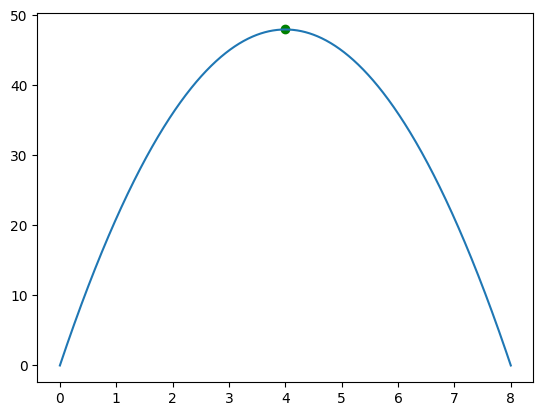

In [23]:
# plot to support your conclusions
w_vals = np.linspace(0, 8, 1000)
speed_func = sp.lambdify(w, N)
speed_vals = speed_func(w_vals)

N_diff_func = sp.lambdify(w, N_diff)
N_diff_vals = N_diff_func(w_vals)


plt.plot(w_vals, N_diff_vals, label="N'(w) - Speed of Spread")
plt.scatter(speed_critical[0], N_diff_func(speed_critical[0]), color='green', label='Max Speed at w=4')

## Problem 3
A manufacturer has determined that the cost $C$ of operating a factory is given by
\begin{equation}C(x)=0.5x^2+10x+7200,\end{equation}
where $x$ is the number of units produced.
* At what level of production will the **average cost** per unit be minimized? (Note: the average cost is the ratio of the cost of producing $x$ units and $x$, the number of produced units).
* What is the minimal average cost per unit produced?

In [6]:
# Define variables and functions
x = sp.symbols('x')
C = 0.5*x**2 + 10*x + 7200

#average cost
A = C / x
A_simplified = sp.simplify(A)
print('Simplified A: ', A_simplified)
print()

# Find critical points
A_diff = A_simplified.diff()
eq = sp.Eq(A_diff, 0)
A_critical = sp.solve(eq, x)
A_critical = [f'{crit:.2f}' for crit in A_critical]
print('Critical points of A: ', A_critical)
print()

# Test the critical point using second derivative
A_sec_diff = A_simplified.diff(x, 2)
p_1 = A_sec_diff.subs(x, A_critical[0]).evalf(2)
p_2 = A_sec_diff.subs(x, A_critical[1]).evalf(2)
print('First critical point using second derivative: ', p_1)
print('Second critical point using second derivative: ', p_2)
print()

#since this doesn't make sense in the real world, a production level of -120 isn't logical, calculate only for 120
minimal_average_cost = A_simplified.subs(x, A_critical[1]).evalf(5)
print(f'Minimal average cost at production level {A_critical[1]} is: ${minimal_average_cost}')

Simplified A:  0.5*x + 10 + 7200/x

Critical points of A:  ['-120.00', '120.00']

First critical point using second derivative:  -0.0083
Second critical point using second derivative:  0.0083

Minimal average cost at production level 120.00 is: $130.00


The critical point with minumum is 120 so this is where the average cost per unit is minimized.
The minimal average cost occurs at x=120 and the minimal average cost is 130 at that production level.

## Problem 4

The following diagram shows a rectangular area ABCD enclosed on three sides by 60 m of fencing, and on the fourth by a wall AB.

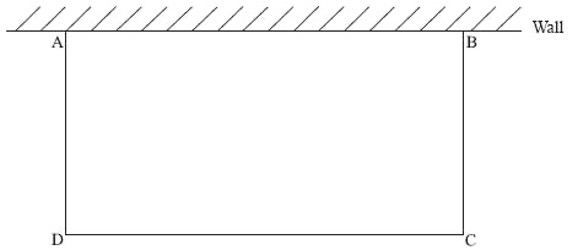


Find the dimensions of the rectangle that enclose maximum area, and then find the maximum area.

In [7]:
# Define variables and the two functions: perimeter and area function
x = sp.symbols('x')

y = (60 - x) / 2  #perimeter
Area = x * y  #area function

Area_simplified = sp.simplify(Area)

#find critical points
Area_diff = Area_simplified.diff()
eq = sp.Eq(Area_diff, 0)
Area_critical = sp.solve(eq, x)
print('Critical points for A: ',Area_critical)

#second derivative test
Area_sec_diff = Area_simplified.diff(x, 2)
p_1 = Area_sec_diff.subs(x, Area_critical[0])
print('Critical point using second derivative: ', p_1)

if p_1 < 0:
  max_x = Area_critical[0]
else:
  print("There is no maximum")

# Express x or y as a function of the other variable and then...
max_y = (60 - max_x) / 2

max_area = max_x * max_y

print()
print(f"Dimensions that enclose maximum area: x = {max_x} meters y = {max_y} meters")
print(f"Maximum area: {max_area} square meters")

Critical points for A:  [30]
Critical point using second derivative:  -1

Dimensions that enclose maximum area: x = 30 meters y = 15 meters
Maximum area: 450 square meters


## Problem 5

A farmer wishes to create a rectangular enclosure, ABCD, of area 525 m^2, as shown below.

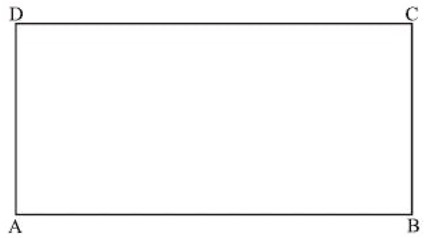

The fencing used for side AB costs 11 dollars per meter. The fencing for the other three sides costs 3 dollars per meter. The farmer creates an enclosure so that the cost is at a minimum. Find this minimum cost.

In [8]:
# The procedure is similtar as in Problem 4
x = sp.symbols('x')

y = 525 / x
C = 11 * x + 3 * (2 * y + x) #cost function

C_simplified = sp.simplify(C)

#find critical points
C_diff = C_simplified.diff()
eq = sp.Eq(C_diff, 0)
C_critical = sp.solve(eq, x)
print('Critical points for C: ', C_critical)

#second derivative test
C_sec_diff = C_simplified.diff(x, 2)
p_1 = C_sec_diff.subs(x, C_critical[1]) #since lengths must be positive we check only for 15
print(f'Critical point using second derivative for {C_critical[1]}: ', p_1)

if p_1 > 0:
  min_x = C_critical[1]
else:
  print("There is no minimum")

min_y = 525 / min_x

min_cost = C_simplified.subs(x, min_x)

print()
print(f"Dimensions for minimum cost: x = {min_x} meters y = {min_y} meters")
print(f"Minimum cost: ${min_cost}")

Critical points for C:  [-15, 15]
Critical point using second derivative for 15:  28/15

Dimensions for minimum cost: x = 15 meters y = 35 meters
Minimum cost: $420


## Problem 6
A crocodile is stalking prey located 20 m further upstream on the opposite bank of a river that is 6 m wide.

Crocodiles travel at different speeds on land and in water.

The time taken for the crocodile to reach its prey can be minimized if it swims to a particular point, **P**, $x$ meters upstream on the other side of the river as shown in the diagram.

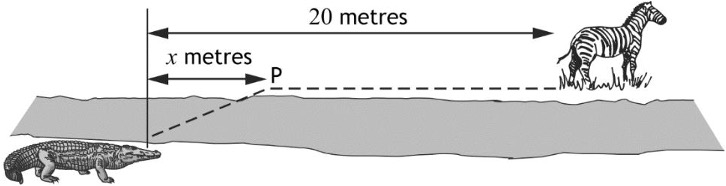

The time taken, $T$, measured in tenths of a second, for the crocodile to reach its prey is given by
\begin{equation}T(x)=7 \sqrt{36+x^2} + 4(20-x)\end{equation}

* Calculate the time taken if the crocodile does not travel on land.
* Calculate the time taken if the crocodile swims the shortest distance possible.
* Between these two extremes there is one value of $x$ which minimizes the time taken. Find this value of $x$ and the minimum possible time. Use Gradient Descent Method with appropriate choice of $x_0$ and $\alpha$.

In [9]:
# Define variables and functions
x = sp.symbols('x')
T = 7 * sp.sqrt(36 + x**2) + 4 * (20 - x)
T_diff = T.diff()

# Lambdify the functions
T_func = sp.lambdify(x, T)
T_diff_func = sp.lambdify(x, T_diff)

# Calculate the time taken if the crocodile does not travel on land.
time_no_land = T_func(0)

# Calculate the time taken if the crocodile swims the shortest distance possible.
time_shortest = T_func(20)

print(f"Time if the crocodile does not travel on land: {time_no_land:.2f} tenths of a second")
print(f"Time if the crocodile swims the shortest distance: {time_shortest:.2f} tenths of a second")

# Finding the minimum time

alpha = 0.1
xk = 0.01
tol = 1e-6
max_iter = 500
k = 0

def gradient_descent (d, df, x0, alpha, tol, max_iter):
    k = 0
    xk = x0

    while k < max_iter and abs(df(xk)) > tol:
        k += 1
        xk = xk - alpha * df(xk)

    return (xk, d(xk), abs(df(xk)), k)

# Run gradient descent calculations
result = gradient_descent(T_func, T_diff_func, xk, alpha, tol, max_iter)

print()
print('Result from gradient descent: ', result)

Time if the crocodile does not travel on land: 122.00 tenths of a second
Time if the crocodile swims the shortest distance: 146.16 tenths of a second

Result from gradient descent:  (np.float64(4.177862240789867), np.float64(114.46737587922891), np.float64(9.68581247207112e-07), 216)


## Challenge problem #1:
**Newton's method** is an important root-finding algorithm that can also be used for optimization. Given a function $f(x)$ and a **good** initial approximation $x_0$, the sequence $x_1, x_2, \ldots$ generated by the recursive rule:
\begin{equation}x_{k+1} = x_k - \frac{f'(x_k )}{f''(x_k)}\end{equation}
converges to a point $x^*$ that satisfies $f'(x^*) = 0$, i.e. to a minimum of the function.

Write a function that accepts: a function $f$, its derivative $f'$ and second derivative $f''$, a starting point $x_0$, a maximum number of iterations $max\_iter$, and a stopping tolerance $tol$ as inputs. Implement Newton's method using the recursive relation given above. Your function should return: the approximate minimum $x^*$, the minimum value $f(x^*)$, the absolute value of the derivative at the approximate minimum $|f'(x^*)|$, and the number of iterations computed.

Test the performance of Newton’s method on the function $T(x)$ from **Problem 3.**, using the same initial approximation $x_0$ you used. Compare the performance of the two methods.

In [10]:
# Implement Newton's Method for minimization

def newton_method(f, df, df2, x0, max_iter = 500, tol = 1e-4):
    # initialize the sequence
    x_k = x0
    n_iter = 0
    # loop until we do not have a solution
    for n_iter in range(1, max_iter + 1):
      # calculate the new iteration
      f_prime = df(x_k)
      f_double_prime = df2(x_k)

      if f_double_prime == 0:
        print("Second derivative is zero.")
        return None

      # update the derivative
      x_k1 = x_k - f_prime / f_double_prime

      if abs(x_k1 - x_k) < tol: #if the change is small enough
            break
      # next iteration
      x_k = x_k1

    f_min = f(x_k)
    f_prime_min = abs(df(x_k))
    # return x_min, min_time, deriv_size, n_iter
    return x_k, f_min, f_prime_min, n_iter

In [11]:
A_func = sp.lambdify(x, A_simplified)
A_diff_func = sp.lambdify(x, A_diff)
A_sec_diff_func = sp.lambdify(x, A_sec_diff)

x0 = 10

x_min, f_min, f_diff, n_iter = newton_method(A_func, A_diff_func, A_sec_diff_func, x0)

print(f"Approximate minimum: {x_min}")
print(f"Function value at x: {f_min}")
print(f"Absolute value of the derivative at x: {f_diff}")
print(f"Number of iterations: {n_iter}")

Approximate minimum: 119.99999783272901
Function value at x: 130.00000000000003
Absolute value of the derivative at x: 1.80605921329402e-08
Number of iterations: 11


## Challenge problem #2

- read the file *Problem - Simple Linear Regression.pdf*

Using first, second derivative

In [12]:
#define symbols
k = sp.symbols('k')

#define function
T = (2 - k)**2 + (1 - 2*k)**2 + (3 - 3*k)**2 + (5 - 4*k)**2

#first derivative
T_diff = T.diff(k)
T_sec_diff = sp.diff(T_diff, k)

#second derivative test
eq = sp.Eq(T_diff, 0)
T_critical = sp.solve(eq, k)
print('Critical points for T: ', T_critical)
p_1 = T_sec_diff.subs(k, T_critical[0])
print(f'Critical point using second derivative for {T_critical[0]}: ', p_1)

if p_1 > 0:
  optimal_k = T_critical[0]
else:
  print("There is no minimum")

print()
print('Optimal k:', optimal_k) #such as the total mistake of the model of data is minimal

Critical points for T:  [11/10]
Critical point using second derivative for 11/10:  60

Optimal k: 11/10


Using Gradiant Descent

In [13]:
T_func = sp.lambdify(k, T_diff)
T_diff_func = sp.lambdify(k, T_diff)

# Set initial parameters for Gradient Descent
alpha = 0.01
xk = 1
tol = 1e-6
max_iter = 500
k1 = 0

def gradient_descent (d, df, x0, alpha, tol, max_iter):
    k1 = 0
    xk = x0

    while k1 < max_iter and abs(df(xk)) > tol:
        k1 += 1
        xk = xk - alpha * df(xk)

    return (xk, d(xk), abs(df(xk)), k1)

# Run gradient descent calculations
result = gradient_descent(T_func, T_diff_func, xk, alpha, tol, max_iter)

# Output the result
print('Result from gradient descent: ', result)

Result from gradient descent:  (1.0999999931280522, -4.123168650949083e-07, 4.123168650949083e-07, 18)
